# The Pedestrian Detection Pipeline
In this notebook the tools created previously are used to detect pedestrians in a given input image. 
Therfore the following steps must be performed:
1. Get the input picture
2. Use sliding window and image pyramids to extract regions of interest 
3. Classify regions of interest with resnet50 adapted for pedestrian detection
4. Apply non maximum surperssion to only dispaly best fitting bounding boxes




In [2]:
# imports
import torch
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from torchvision import datasets, transforms, models
import os
import time
import copy
from pathlib import Path

#### Load resnet50 trained for pedestrian detection:

In [3]:
# get model from library
model = models.resnet50(pretrained=True)
# remove original output layer and replace it with 2 dimensinal layer 
number_input_features  = model.fc.in_features
num_classes =2
model.fc = nn.Linear(number_input_features, num_classes)
# load model trained in second notebook
model.load_state_dict(torch.load('./saved_models/pedestrianClassifier15Epochs.pt'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

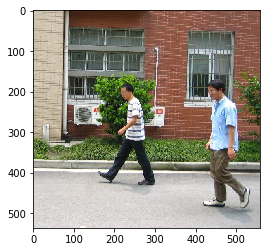

In [4]:
# get an image to test
directory = './data/PennFudanPed/PNGImages'
jpg_image = 'FudanPed00001.png'

# display the selected image
sample_image = Image.open(os.path.join(directory,jpg_image))
plt.imshow(sample_image)

In [ ]:
from helpers import sliding_window, image_pyramid, display_bounding_box

def detect_pedestrian(image, model,slidingWindow_parameters=None,ImagePyramid_parameters=None):
    # initialize image pyramid
    for img_pyramide in imgPyramide:
    
    sliding = sliding_window(img_pyramide,window_size=(width,height),step_h=stride_h,step_w=stride_w)
    
    # initialize sliding window
    for slide_img in sliding:
        windowBox= np.array([slide_img[0],slide_img[1],slide_img[0]+width,slide_img[1]+height]).reshape((1,4))
        img = display_bounding_box(img_pyramide,box_coordinates,display=False, resize=(400,381))
    
    
    
    